In [273]:
import numpy as np
import pandas as pd
import math
import time
import cv2 as cv
import pytesseract
from matplotlib import pyplot as plt
import statistics

In [274]:
doc = cv.imread('doc.jpg', 0) #Note that the second parameter of imread is set to 0
doc = cv.cvtColor(doc, cv.COLOR_BAYER_BG2GRAY)
threshold = 200
ret, doc_bin = cv.threshold(doc, threshold, 255, cv.THRESH_BINARY)
doc_bin = 255 - doc_bin #convert black/white to white/black

In [275]:
# Apply the Component analysis function
analysis = cv.connectedComponentsWithStats(doc_bin, 4, cv.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis
output = np.zeros(doc_bin.shape, dtype="uint8")

In [276]:
def ExtractConnectedComponents(num_labels, labels_im):
    connected_components = [[] for i in range(0, num_labels)]
 
    height, width = labels_im.shape
    for i in range(0, height):
        for j in range(0, width):
            if labels_im[i, j] >= 0:
                connected_components[labels_im[i, j]].append((j, i))

    return connected_components

In [277]:
option = 3
tic = time.perf_counter()
if option == 1:
    output = doc_bin
    #cv.imwrite('1.jpg',output)
toc = time.perf_counter()
if option == 2:
    a = analysis[3].astype(int)
    for i in a:
        v = a[i]
        x = v[0]
        y = v[1]
        output[y,x] = 255
    toc = time.perf_counter()
    #cv.imwrite('2.jpg',output)
if option == 3:
    num_labels, labels_im = cv.connectedComponents(doc_bin)
    connected_components = ExtractConnectedComponents(num_labels, labels_im)
    temp = []
    for i in range(0,num_labels):
        a = connected_components[i][-1]
        temp.append(a)
        x = temp[i][0]
        y = temp[i][1]
        output[y,x] = 255    
    toc = time.perf_counter()
    #cv.imwrite('3.jpg',output)
print(toc-tic)

1.194881500000065


In [278]:
spatial_res = 1
angular_res = math.pi/180
density_thresh = 10 # Change Value for 
lines = cv.HoughLines(output, spatial_res, angular_res, density_thresh)

In [279]:
angles = np.zeros(len(lines),np.float32)
for k in range(0,len(lines)):
    dis, l_angle = lines[k][0]
    angles[k] = l_angle
angle = statistics.median(angles) * 180 / math.pi
print(angle)

74.99999867197056


True

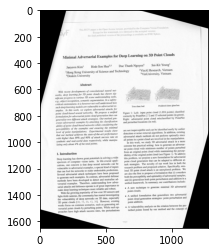

In [280]:
# rotate image
height, width = doc.shape
c_x = (width - 1) / 2.0 # column index varies in [0, width-1]
c_y = (height - 1) / 2.0 # row index varies in [0, height-1]
c = (c_x, c_y) # A point is defined by x and y coordinate
M = cv.getRotationMatrix2D(c, angle-90, 1)
doc_deskewed = cv.warpAffine(doc, M, (width, height))
plt.imshow(doc_deskewed, 'gray')
cv.imwrite('deskew.jpg',doc_deskewed)

---- 

In [281]:
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"

In [282]:
doctext = pytesseract.image_to_string(doc)
textdoc = pytesseract.image_to_string(doc_deskewed)
print(doctext)

4c
pee? jas gow goat potenti io
spe of ot yisio®™ aasks- ww eo
cations one cone ys wet so peur er vores can
uynes ble 0 averse examples” ase" ah or n> cease
hat can foo! we pervs u ew Arad 9 gctio™ nat a u owt at
eves oave™ 4a) aura syn we weet pro st te Ost ‘ 0 0
0 generate guct exe jn contrast adv jal. gerens® gute pete silty and opti of
ods Bae pee evel to oe and peunsaiise ad 33.00) ele paint vaio os
versal ex 2 et ager cited ee so jon gnclod®
gail at ks and gerene® oF cake is of gett Sport i)
make gee? yearn pnt yes ore eid, and sopust: oh gue yo om ani gave’ a
wit WE goin popslat of owt agp senses point 3
ee aera at aie for lation + gene alse «wo esas
pains ¢ dee? nel orks of 30 gate est a\¥ oo sot oe west on 8 ak esi oil et ont 90 on
3p ant jouds ao 19, a, 36\- pow’ exis wae 508 i
orks yoous nro § ario8> gue ggnea ade 5
versa ‘point qjouds vy yo points wile guch 80 Py She ner TY analy sn te erasio® sxee!
pave wth auoe® goers Sy po 3005 ws nts f nd OY out gett and te concert of



In [283]:
print(textdoc)

Jaeyeon Kim‘ Binh-Son Hua”*

‘Deakin University

Abstract

With recent developments of convolutional neural net-
works, deep learning for 3D point clouds has shown sig-
nificant progress in various 3D scene understanding tasks,
e.g., object recognition, semantic segmentation Ina safety-
critical environment, it is however not well understood how
such deep learning models are vulnerable to adversarial ex-
amples. In this work, we explore adversarial attacks for
point cloud-based neural networks, We propose a unified
formulation for adversarial point cloud generation that can
generalise two different attack strategies. Our method gen-
erates adversarial examples by attacking the classification
ability of point cloud-based ne tworks while considering the
perceptibility of the examples and ensuring the minimal
evel of point manipulations. Experimental results show
that our method achieves the state-of-the-art performance
with higher than 89% and 90% of attack success rate on
synthetic and 

In [284]:
pdf = pytesseract.image_to_pdf_or_hocr(doc, extension="pdf")
pdf1 = pytesseract.image_to_pdf_or_hocr(doc_deskewed, extension="pdf")
with open("doc_txt.pdf", "w+b") as f:
    f. write(pdf)
with open("doc1_txt.pdf", "w+b") as f:
    f. write(pdf1)

----

In [285]:
def doc_recog(path):
    doc = cv.imread(path, 0) 
    doc = cv.cvtColor(doc, cv.COLOR_BAYER_BG2GRAY)
    threshold = 200
    ret, doc_bin = cv.threshold(doc, threshold, 255, cv.THRESH_BINARY)
    doc_bin = 255 - doc_bin #convert black/white to white/black
    
    analysis = cv.connectedComponentsWithStats(doc_bin, 4, cv.CV_32S)
    (totalLabels, label_ids, values, centroid) = analysis
    output = np.zeros(doc_bin.shape, dtype="uint8")
    output = doc_bin
    
    stat = analysis[2]
    for i in range(len(stat)):
        c = stat[i]
        x = c[0]
        y = c[1]
        output[y,x] = 255
    
    spatial_res = 1
    angular_res = math.pi/180
    density_thresh = 40  
    lines = cv.HoughLines(output, spatial_res, angular_res, density_thresh)
    
    angles = np.zeros(len(lines),np.float32)
    for k in range(0,len(lines)):
        dis, l_angle = lines[k][0]
        angles[k] = l_angle
    angle = statistics.median(angles) * 180 / math.pi
    
    height, width = doc.shape
    c_x = (width - 1) / 2.0 # column index varies in [0, width-1]
    c_y = (height - 1) / 2.0 # row index varies in [0, height-1]
    c = (c_x, c_y) # A point is defined by x and y coordinate
    M = cv.getRotationMatrix2D(c, angle-90, 1)
    doc_deskewedx = cv.warpAffine(doc, M, (width, height))
    
    pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"
    text1 = pytesseract.image_to_string(doc_deskewedx)
    
    out = pytesseract.image_to_pdf_or_hocr(doc_deskewedx, extension="pdf")
    
    with open("out_txt.pdf", "w+b") as f:
        f. write(out)

In [286]:
doc_recog('doc.jpg')